In [2]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from collections import Counter
from sklearn.preprocessing import Normalizer

In [3]:
preprocessed_data = pd.read_csv('data_preprocessed.csv')

In [4]:
preprocessed_data.shape
preprocessed_data.head(1)

,Unnamed: 0,teacher_id,teacher_prefix,school_state,project_grade_category,project_subject_categories,project_subject_subcategories,teacher_number_of_previously_posted_projects,project_is_approved,price,quantity,titles_word_count,essays_word_count,project_year_month,preprocessed_titles,preprocessed_essays,preprocessed_res_summary
0,0,c90749f5d961ff158d4b4d1e7dc665fc,mrs,in,grades_prek_2,literacy_language,"esl, literacy",0,0,154.6,23,7,272,16-12,educational support for english learners at home,my students are english learners that are work...,my students need opportunities to practice beg...


# Splitting data into X & Y

In [5]:
y = preprocessed_data['project_is_approved'].values
x = preprocessed_data.drop(['project_is_approved'], axis=1)
x.head(1)

,Unnamed: 0,teacher_id,teacher_prefix,school_state,project_grade_category,project_subject_categories,project_subject_subcategories,teacher_number_of_previously_posted_projects,price,quantity,titles_word_count,essays_word_count,project_year_month,preprocessed_titles,preprocessed_essays,preprocessed_res_summary
0,0,c90749f5d961ff158d4b4d1e7dc665fc,mrs,in,grades_prek_2,literacy_language,"esl, literacy",0,154.6,23,7,272,16-12,educational support for english learners at home,my students are english learners that are work...,my students need opportunities to practice beg...


# Splitting data into Train & Test data

In [6]:
from sklearn.model_selection import train_test_split
x_tr, x_te, y_tr, y_te = train_test_split(x, y, test_size=0.33, stratify=y)
print(y_tr.size)
print(y_te.size)
print(x_tr.shape)
print(x_te.shape)

73196
36052
(73196, 16)
(36052, 16)


# Featurization of Essay, Project_title, Project Summary using BoW

In [7]:
def bow(vectorizer, x_train, x_test):
    vectorizer.fit(x_train)

    x_train_bow = vectorizer.transform(x_train)
    x_test_bow = vectorizer.transform(x_test)
    return (x_train_bow, x_test_bow)

In [8]:
#Essays featurization
vectorizer = CountVectorizer(min_df=10,ngram_range=(1,4))
(x_tr_essay_bow, x_te_essay_bow) = bow (vectorizer, x_tr['preprocessed_essays'].values, x_te['preprocessed_essays'].values)
print("x_train essays matrix dimensions", x_tr_essay_bow.shape)
print("x_test essays matrix dimensions", x_te_essay_bow.shape)

#Titles featurization
vectorizer = CountVectorizer()
(x_tr_title_bow, x_te_title_bow) = bow (vectorizer, x_tr['preprocessed_titles'].values, x_te['preprocessed_titles'].values)

print("x_train titles matrix dimensions", x_tr_title_bow.shape)
print("x_test titles matrix dimensions", x_te_title_bow.shape)

#Resource Summaries
vectorizer = CountVectorizer()
(x_tr_res_summary_bow, x_te_res_summary_bow) = bow (vectorizer, x_tr['preprocessed_res_summary'].values, x_te['preprocessed_res_summary'].values)

print("x_test titles matrix dimensions", x_tr_res_summary_bow.shape)
print("x_test titles matrix dimensions", x_te_res_summary_bow.shape)

x_train essays matrix dimensions (73196, 511972)
x_test essays matrix dimensions (36052, 511972)
x_train titles matrix dimensions (73196, 14028)
x_test titles matrix dimensions (36052, 14028)
x_test titles matrix dimensions (73196, 18860)
x_test titles matrix dimensions (36052, 18860)



# Featurization of Essays, Project Titles, Resource Summary using tf-idf

In [9]:
def tfidf(vectorizer, x_train, x_test):
    vectorizer.fit(x_train)

    x_train_bow = vectorizer.transform(x_train)
    x_test_bow = vectorizer.transform(x_test)
    return (x_train_bow, x_test_bow)

In [10]:
#Essays featurization
vectorizer = TfidfVectorizer(min_df=10,ngram_range=(1,4))
(x_tr_essay_tfidf, x_te_essay_tfidf) = bow (vectorizer, x_tr['preprocessed_essays'].values, x_te['preprocessed_essays'].values)
print("x_train essays matrix dimensions", x_tr_essay_tfidf.shape)
print("x_test essays matrix dimensions", x_te_essay_tfidf.shape)

#Titles featurization
vectorizer = CountVectorizer()
(x_tr_title_tfidf, x_te_title_tfidf) = bow (vectorizer, x_tr['preprocessed_titles'].values, x_te['preprocessed_titles'].values)

print("x_train titles matrix dimensions", x_tr_title_tfidf.shape)
print("x_test titles matrix dimensions", x_te_title_tfidf.shape)

#Resource Summaries
vectorizer = CountVectorizer()
(x_tr_res_summary_tfidf, x_te_res_summary_tfidf) = bow (vectorizer, x_tr['preprocessed_res_summary'].values, x_te['preprocessed_res_summary'].values)

print("x_test titles matrix dimensions", x_tr_res_summary_tfidf.shape)
print("x_test titles matrix dimensions", x_te_res_summary_tfidf.shape)

x_train essays matrix dimensions (73196, 511972)
x_test essays matrix dimensions (36052, 511972)
x_train titles matrix dimensions (73196, 14028)
x_test titles matrix dimensions (36052, 14028)
x_test titles matrix dimensions (73196, 18860)
x_test titles matrix dimensions (36052, 18860)


# Featurization of Categorical features


In [11]:
def ohe(vectorizer, x_train, x_test):
    vectorizer.fit(x_train)

    x_train_ohe = vectorizer.transform(x_train)
    x_test_ohe = vectorizer.transform(x_test)
    return (x_train_bow, x_test_bow)

In [12]:
vectorizer = CountVectorizer()

# Project_subject_categories
(x_tr_subjects_ohe, x_te_subjects_ohe) = bow (vectorizer, x_tr['project_subject_categories'].values, x_te['project_subject_categories'].values)
print("x_train subject categories matrix dimensions", x_tr_subjects_ohe.shape)
print("x_test subject categories matrix dimensions", x_te_subjects_ohe.shape)
print(50*"=")

# Project_subject_subcategories
(x_tr_subject_subcat_ohe, x_te_subject_subcat_ohe) = bow (vectorizer, x_tr['project_subject_subcategories'].values, x_te['project_subject_subcategories'].values)
print("x_train subject subcategories matrix dimensions", x_tr_subject_subcat_ohe.shape)
print("x_test subject subcategories matrix dimensions", x_te_subject_subcat_ohe.shape)
print(50*"=")

# Teachers
(x_tr_teacher_ohe, x_te_teacher_ohe) = bow (vectorizer, x_tr['teacher_id'].values, x_te['teacher_id'].values)
print("x_train teachers matrix dimensions", x_tr_teacher_ohe.shape)
print("x_test teachers matrix dimensions", x_te_teacher_ohe.shape)
print(50*"=")

# Teacher_prefixs
(x_tr_teacher_prefix_ohe, x_te_teacher_prefix_ohe) = bow (vectorizer, x_tr['teacher_prefix'].values, x_te['teacher_prefix'].values)
print("x_train teacher prefixs matrix dimensions", x_tr_teacher_prefix_ohe.shape)
print("x_test teacher prefixs matrix dimensions", x_te_teacher_prefix_ohe.shape)
print(50*"=")

# School state codes
(x_tr_school_state_ohe, x_te_school_state_ohe) = bow (vectorizer, x_tr['school_state'].values, x_te['school_state'].values)
print("x_train state codes matrix dimensions", x_tr_school_state_ohe.shape)
print("x_test state codes matrix dimensions", x_te_school_state_ohe.shape)
print(50*"=")

# Project grade categories
(x_tr_grade_ohe, x_te_grade_ohe) = bow (vectorizer, x_tr['project_grade_category'].values, x_te['project_grade_category'].values)
print("x_train grade categories matrix dimensions", x_tr_grade_ohe.shape)
print("x_test grade categories matrix dimensions", x_te_grade_ohe.shape)

x_train subject categories matrix dimensions (73196, 11)
x_test subject categories matrix dimensions (36052, 11)
x_train subject subcategories matrix dimensions (73196, 29)
x_test subject subcategories matrix dimensions (36052, 29)
x_train teachers matrix dimensions (73196, 52913)
x_test teachers matrix dimensions (36052, 52913)
x_train teacher prefixs matrix dimensions (73196, 5)
x_test teacher prefixs matrix dimensions (36052, 5)
x_train state codes matrix dimensions (73196, 51)
x_test state codes matrix dimensions (36052, 51)
x_train grade categories matrix dimensions (73196, 4)
x_test grade categories matrix dimensions (36052, 4)


# Normalization - Price, Quantity, Previous Projects, Word_counts

In [13]:
def norm(x_train, x_test):
    normalizer = Normalizer()
    normalizer.fit(x_train)

    x_train_norm = normalizer.transform(x_train)
    x_test_norm = normalizer.transform(x_test)
    return (x_train_norm, x_test_norm)

In [14]:
#Project Price
(x_tr_price_norm, x_te_price_norm) = norm(x_tr['price'].values.reshape(-1,1), x_te['price'].values.reshape(-1,1))

#Resource Quantities
(x_tr_quantity_norm, x_te_quantity_norm) = norm(x_tr['quantity'].values.reshape(-1,1), x_te['quantity'].values.reshape(-1,1))

#Previously posted projects by a teacher
(x_tr_prev_projects_norm, x_te_prev_projects_norm) = norm(x_tr['teacher_number_of_previously_posted_projects'].values.reshape(-1,1), x_te['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

#No. of Words in a title
(x_tr_title_word_count_norm, x_te_title_word_count_norm) = norm(x_tr['titles_word_count'].values.reshape(-1,1), x_te['titles_word_count'].values.reshape(-1,1))

#No. of Words in an essay
(x_tr_essay_word_count_norm, x_te_essay_word_count_norm) = norm(x_tr['essays_word_count'].values.reshape(-1,1), x_te['essays_word_count'].values.reshape(-1,1))

# Stacking of vectors (BoW Featurization of text features)

In [15]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
X_tr_bow = hstack((x_tr_essay_bow, x_tr_title_bow, x_tr_res_summary_bow, x_tr_subjects_ohe, x_tr_subject_subcat_ohe.shape, x_tr_school_state_ohe.shape, x_tr_teacher_ohe, x_tr_teacher_prefix_ohe.shape, x_tr_grade_ohe, x_tr_price_norm, x_tr_quantity_norm, x_tr_prev_projects_norm, x_tr_essay_word_count_norm, x_tr_title_word_count_norm)).tocsr()
X_te_bow = hstack((x_te_essay_bow, x_te_title_bow, x_te_res_summary_bow, x_te_subjects_ohe, x_te_subject_subcat_ohe.shape, x_te_school_state_ohe.shape, x_te_teacher_ohe, x_te_teacher_prefix_ohe.shape, x_te_grade_ohe, x_te_price_norm, x_te_quantity_norm, x_te_prev_projects_norm, x_te_essay_word_count_norm, x_te_title_word_count_norm)).tocsr()

print("Final Data matrix")
print(X_tr_bow.shape, y_tr.shape)
print(X_te_bow.shape, y_te.shape)

Final Data matrix
(73196, 597878) (73196,)
(36052, 597878) (36052,)


# Stacking of vectors (tf-idf Featurization of text features)


In [16]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
X_tr_tfidf = hstack((x_tr_essay_tfidf, x_tr_title_tfidf, x_tr_res_summary_tfidf, x_tr_subjects_ohe, x_tr_subject_subcat_ohe.shape, x_tr_teacher_ohe, x_tr_school_state_ohe.shape, x_tr_teacher_prefix_ohe.shape, x_tr_grade_ohe, x_tr_price_norm, x_tr_quantity_norm, x_tr_prev_projects_norm, x_tr_essay_word_count_norm, x_tr_title_word_count_norm)).tocsr()
X_te_tfidf = hstack((x_te_essay_tfidf, x_te_title_tfidf, x_te_res_summary_tfidf, x_te_subjects_ohe, x_te_subject_subcat_ohe.shape, x_te_teacher_ohe, x_te_school_state_ohe.shape, x_te_teacher_prefix_ohe.shape, x_te_grade_ohe, x_te_price_norm, x_te_quantity_norm, x_te_prev_projects_norm, x_te_essay_word_count_norm, x_te_title_word_count_norm)).tocsr()

print("Final Data matrix")
print(X_tr_tfidf.shape, y_tr.shape)
print(X_te_tfidf.shape, y_te.shape)

Final Data matrix
(73196, 597878) (73196,)
(36052, 597878) (36052,)


# Naive Bayes (BoW Featurization of text features)

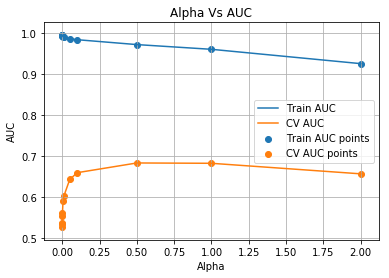

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,2.241206,0.230221,0.202662,0.030682,1e-05,{'alpha': 1e-05},0.528675,0.530622,0.528555,0.527095,...,0.527066,0.003526,12,0.994748,0.995420,0.994320,0.995121,0.994948,0.994911,0.000369
1,2.287498,0.139803,0.224758,0.008767,5e-05,{'alpha': 5e-05},0.535072,0.538285,0.534952,0.532807,...,0.534020,0.003066,11,0.994170,0.994938,0.993642,0.994568,0.994449,0.994353,0.000432
2,2.291105,0.167681,0.236828,0.013066,0.0001,{'alpha': 0.0001},0.539016,0.541107,0.540520,0.535251,...,0.537714,0.003242,10,0.993917,0.994679,0.993332,0.994300,0.994146,0.994075,0.000447
3,2.286816,0.166619,0.209280,0.022677,0.0005,{'alpha': 0.0005},0.554009,0.557748,0.554950,0.555372,...,0.553478,0.004267,9,0.992976,0.993879,0.992336,0.993587,0.993304,0.993216,0.000532
4,2.312393,0.165930,0.201249,0.041919,0.001,{'alpha': 0.001},0.558751,0.564571,0.564227,0.565405,...,0.561191,0.004722,8,0.992470,0.993444,0.991743,0.993139,0.992781,0.992715,0.000587


In [17]:
nb = MultinomialNB(class_prior=[0.5,0.5])
parameters = {'alpha':[0.00001,0.00005, 0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,0.5,1,2]}
clf = GridSearchCV(nb, parameters, cv=5, scoring='roc_auc')
clf.fit(X_tr_bow, y_tr)

results = pd.DataFrame.from_dict(clf.cv_results_)
results = results.sort_values(['param_alpha'])

train_auc= results['mean_train_score']
cv_auc = results['mean_test_score'] 
alp =  results['param_alpha']

plt.plot(alp, train_auc, label='Train AUC')
plt.plot(alp, cv_auc, label='CV AUC')
plt.scatter(alp, train_auc, label='Train AUC points')
plt.scatter(alp, cv_auc, label='CV AUC points')
plt.legend()
plt.xlabel("Alpha")
plt.ylabel("AUC")
plt.title("Alpha Vs AUC")
plt.grid()
plt.show()
results.head()

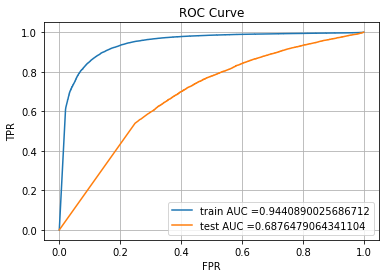

In [18]:
from sklearn.metrics import roc_curve, auc

nb = MultinomialNB(alpha=1,class_prior=[0.5,0.5])
nb.fit(X_tr_bow, y_tr)

y_tr_pred = nb.predict_proba(X_tr_bow)[:,1]
y_te_pred = nb.predict_proba(X_te_bow)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_tr, y_tr_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_te, y_te_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve")
plt.grid()
plt.show()

In [19]:
def best_threshold(threshold, fpr, tpr):
    t = threshold[np.argmax(tpr*(1-fpr))]
    print("best threshold:", t)
    print(50*"=")
    return t

def prediction(proba, threshold):
    predictions = []
    for i in proba:
        if i>=threshold:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [20]:
t = best_threshold(tr_thresholds, train_fpr, train_tpr)

print("Test Accuracy Score")
print(accuracy_score(y_te, prediction(y_te_pred, t)))
print(50*"=")

print("Test F1 Score")
print(f1_score(y_te, prediction(y_te_pred, t)))

best threshold: 0.24048641260415046
Test Accuracy Score
0.7859758127149673
Test F1 Score
0.8722431949135705


# Naive Bayes (tf-idf Featurization of text features)

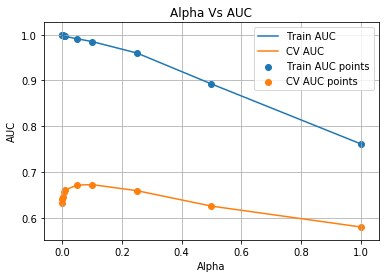

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,2.290565,0.137280,0.243211,0.022322,0.0001,{'alpha': 0.0001},0.640225,0.626610,0.628172,0.645730,...,0.632891,0.008537,8,0.999078,0.999107,0.999056,0.999022,0.998997,0.999052,0.000039
1,2.322466,0.170428,0.231623,0.022210,0.0005,{'alpha': 0.0005},0.647978,0.634104,0.636427,0.653706,...,0.640723,0.008606,7,0.998735,0.998773,0.998731,0.998671,0.998643,0.998711,0.000047
2,2.299957,0.176173,0.213747,0.036222,0.001,{'alpha': 0.001},0.651962,0.637948,0.640711,0.657745,...,0.644734,0.008634,6,0.998486,0.998529,0.998494,0.998416,0.998389,0.998463,0.000052
3,2.257868,0.189954,0.220046,0.028226,0.005,{'alpha': 0.005},0.662631,0.648093,0.652588,0.668157,...,0.655505,0.008528,5,0.997353,0.997413,0.997398,0.997258,0.997252,0.997335,0.000068
4,2.281111,0.130771,0.223565,0.038066,0.01,{'alpha': 0.01},0.667791,0.652980,0.658214,0.672952,...,0.660627,0.008442,3,0.996392,0.996471,0.996458,0.996284,0.996301,0.996381,0.000077


In [21]:
nb = MultinomialNB(class_prior=[0.5,0.5])
parameters = {'alpha':[0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,0.25,0.5,1]}
clf = GridSearchCV(nb, parameters, cv=5, scoring='roc_auc')
clf.fit(X_tr_tfidf, y_tr)

results = pd.DataFrame.from_dict(clf.cv_results_)
results = results.sort_values(['param_alpha'])

train_auc= results['mean_train_score']
cv_auc = results['mean_test_score'] 
alp =  results['param_alpha']

plt.plot(alp, train_auc, label='Train AUC')
plt.plot(alp, cv_auc, label='CV AUC')
plt.scatter(alp, train_auc, label='Train AUC points')
plt.scatter(alp, cv_auc, label='CV AUC points')
plt.legend()
plt.xlabel("Alpha")
plt.ylabel("AUC")
plt.title("Alpha Vs AUC")
plt.grid()
plt.show()

results.head()

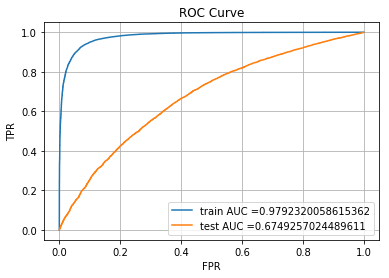

In [22]:
from sklearn.metrics import roc_curve, auc

nb = MultinomialNB(alpha=0.1, class_prior=[0.5,0.5] )
nb.fit(X_tr_tfidf, y_tr)

y_tr_pred = nb.predict_proba(X_tr_tfidf)[:,1]
y_te_pred = nb.predict_proba(X_te_tfidf)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_tr, y_tr_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_te, y_te_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve")
plt.grid()
plt.show()

In [23]:
t = best_threshold(tr_thresholds, train_fpr, train_tpr)

print("Test Accuracy Score")
print(accuracy_score(y_te, prediction(y_te_pred, t)))
print(50*"=")

print("Test F1 Score")
print(f1_score(y_te, prediction(y_te_pred, t)))

best threshold: 0.3386776027970654
Test Accuracy Score
0.7803727948518806
Test F1 Score
0.8693097415244446


# Logistic Regression (BoW Featurization of text features)

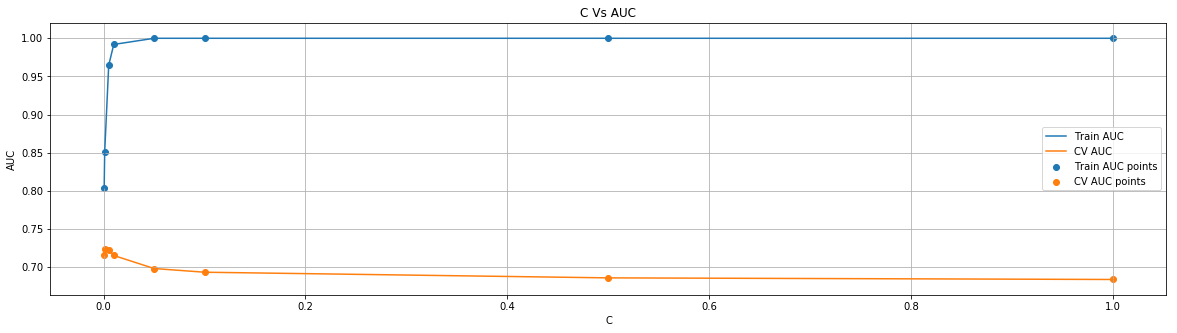

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,10.976234,0.933173,0.067678,0.007375,0.0005,{'C': 0.0005},0.720746,0.714874,0.712621,0.716080,0.003425,3,0.802227,0.804329,0.805363,0.803973,0.001305
1,15.445987,0.319352,0.073260,0.019004,0.001,{'C': 0.001},0.729523,0.722691,0.721060,0.724425,0.003666,1,0.849813,0.850847,0.852207,0.850956,0.000980
2,31.017597,1.721305,0.084206,0.040564,0.005,{'C': 0.005},0.727407,0.721733,0.719709,0.722950,0.003258,2,0.964839,0.964095,0.965117,0.964684,0.000431
3,37.713764,6.688903,0.055265,0.015992,0.01,{'C': 0.01},0.719639,0.714377,0.712279,0.715432,0.003096,4,0.991970,0.991715,0.992112,0.991932,0.000164
4,63.031635,11.340680,0.067705,0.007382,0.05,{'C': 0.05},0.702247,0.697309,0.695452,0.698336,0.002867,5,0.999994,0.999988,0.999991,0.999991,0.000002


In [39]:
lr = LogisticRegression()
parameters = {'C':[0.0005,0.001,0.005,0.01,0.05,0.1,0.5,1]}
clf = GridSearchCV(lr, parameters, cv=3, scoring='roc_auc')
clf.fit(X_tr_bow, y_tr)

results = pd.DataFrame.from_dict(clf.cv_results_)
results = results.sort_values(['param_C'])

train_auc= results['mean_train_score']
cv_auc = results['mean_test_score'] 
C =  results['param_C']

plt.figure(figsize=(20,5))
plt.plot(C, train_auc, label='Train AUC')
plt.plot(C, cv_auc, label='CV AUC')
plt.scatter(C, train_auc, label='Train AUC points')
plt.scatter(C, cv_auc, label='CV AUC points')
plt.legend()
plt.xlabel("C")
plt.ylabel("AUC")
plt.title("C Vs AUC")
plt.grid()
plt.show()
results.head()

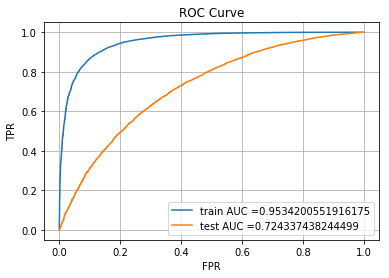

In [24]:
lr = LogisticRegression(C=0.005)
lr.fit(X_tr_bow, y_tr)

y_tr_pred = lr.predict_proba(X_tr_bow)[:,1]
y_te_pred = lr.predict_proba(X_te_bow)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_tr, y_tr_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_te, y_te_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve")
plt.grid()
plt.show()

In [25]:
t = best_threshold(tr_thresholds, train_fpr, train_tpr)

print("Test Accuracy Score")
print(accuracy_score(y_te, prediction(y_te_pred, t)))
print(50*"=")

print("Test F1 Score")
print(f1_score(y_te, prediction(y_te_pred, t)))

best threshold: 0.7937992778704934
Test Accuracy Score
0.7624542327748808
Test F1 Score
0.8525685167332323


# Logistic Regression (tf-idf Featurization of text features)

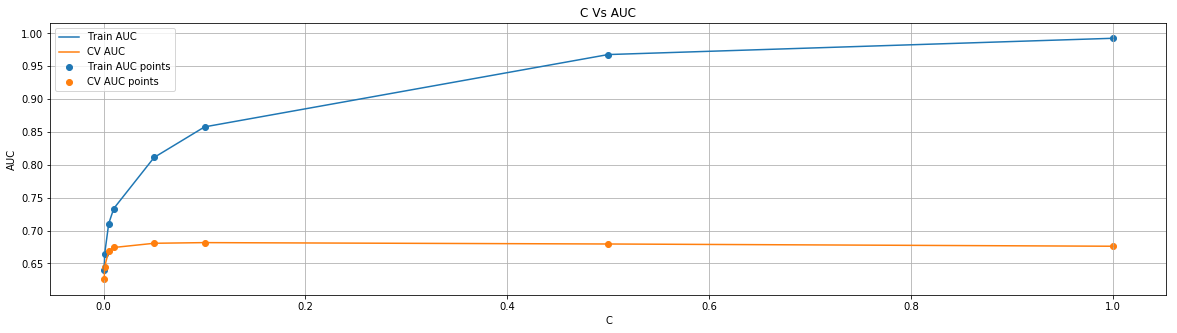

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,10.703428,0.497781,0.127919,0.016288,0.0005,{'C': 0.0005},0.624931,0.621765,0.630044,0.625580,0.003411,8,0.640502,0.640626,0.639356,0.640161,0.000572
1,13.168103,0.231938,0.118284,0.014656,0.001,{'C': 0.001},0.644495,0.642421,0.648586,0.645167,0.002561,7,0.665571,0.664721,0.663837,0.664709,0.000708
2,17.432159,0.457629,0.112885,0.013914,0.005,{'C': 0.005},0.666799,0.668753,0.671135,0.668896,0.001773,6,0.711479,0.709148,0.711131,0.710586,0.001027
3,22.958646,1.858545,0.135191,0.009021,0.01,{'C': 0.01},0.672132,0.674959,0.675603,0.674231,0.001507,5,0.734251,0.731733,0.734546,0.733510,0.001262
4,43.331998,3.030080,0.147883,0.007454,0.05,{'C': 0.05},0.679067,0.682725,0.680171,0.680654,0.001532,2,0.811165,0.809833,0.812637,0.811212,0.001145


In [26]:
lr = LogisticRegression()
parameters = {'C':[0.0005,0.001,0.005,0.01,0.05,0.1,0.5,1]}
clf = GridSearchCV(lr, parameters, cv=3, scoring='roc_auc')
clf.fit(X_tr_tfidf, y_tr)

results = pd.DataFrame.from_dict(clf.cv_results_)
results = results.sort_values(['param_C'])

train_auc= results['mean_train_score']
cv_auc = results['mean_test_score'] 
C =  results['param_C']

plt.figure(figsize=(20,5))
plt.plot(C, train_auc, label='Train AUC')
plt.plot(C, cv_auc, label='CV AUC')
plt.scatter(C, train_auc, label='Train AUC points')
plt.scatter(C, cv_auc, label='CV AUC points')
plt.legend()
plt.xlabel("C")
plt.ylabel("AUC")
plt.title("C Vs AUC")
plt.grid()
plt.show()
results.head()

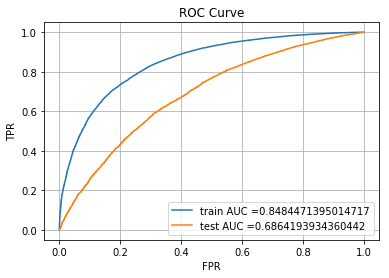

In [30]:
lr = LogisticRegression(C=0.1)
lr.fit(X_tr_tfidf, y_tr)

y_tr_pred = lr.predict_proba(X_tr_tfidf)[:,1]
y_te_pred = lr.predict_proba(X_te_tfidf)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_tr, y_tr_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_te, y_te_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve")
plt.grid()
plt.show()

In [31]:
t = best_threshold(tr_thresholds, train_fpr, train_tpr)

print("Test Accuracy Score")
print(accuracy_score(y_te, prediction(y_te_pred, t)))
print(50*"=")

print("Test F1 Score")
print(f1_score(y_te, prediction(y_te_pred, t)))

best threshold: 0.8275693735629289
Test Accuracy Score
0.7033451680905359
Test F1 Score
0.8074395491618805
